Try to detect anomalies based on Tweet mentions.

In [1]:
import os, time
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import normalize
from sklearn import svm

Lets load and look at all the tweet data.

In [2]:
df = []
dfDict = {}
for dirname, _, filenames in os.walk('../data/realTweets/'):
    for i, filename in enumerate(filenames):
        df.append(pd.read_csv('../data/realTweets/' + filename))
        dfDict[i] = filename

Lets break the tweets up by day of the week.
This was borrowed from:
https://www.kaggle.com/victorambonati/unsupervised-anomaly-detection

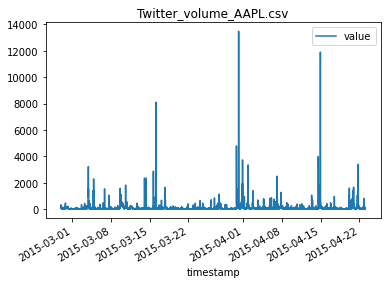

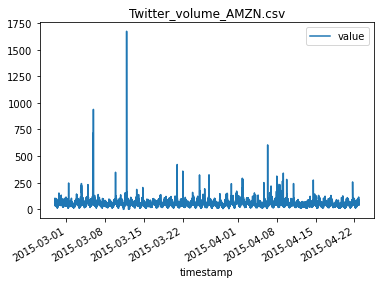

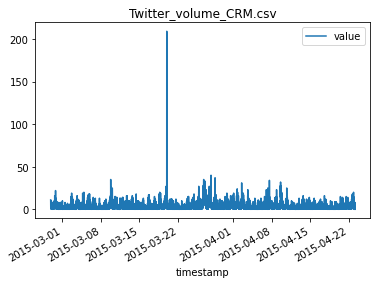

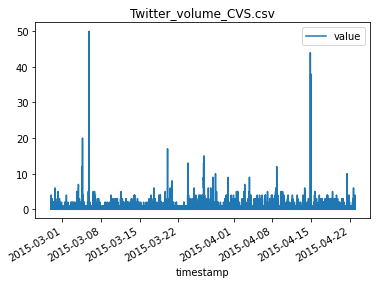

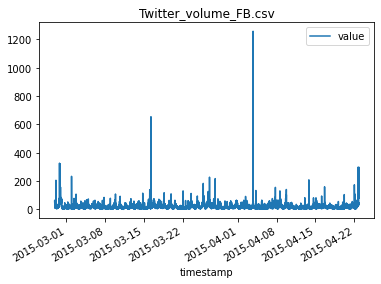

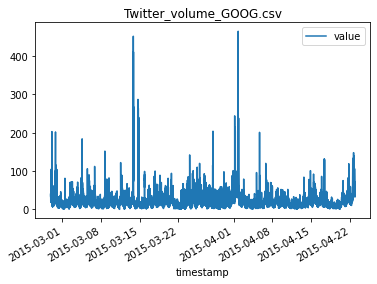

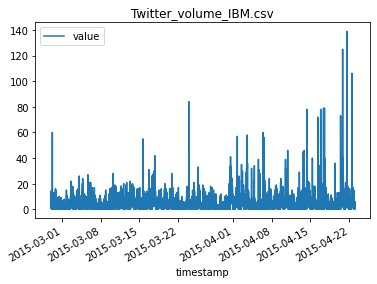

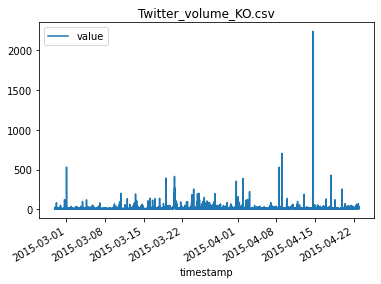

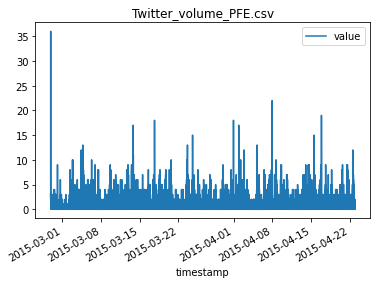

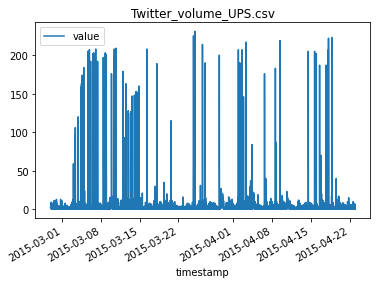

In [3]:
for i, data in enumerate(df):
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['DayOfTheWeek'] = data['timestamp'].dt.dayofweek
    data.plot(x='timestamp', y='value');
    plt.title(dfDict[i])
    data['hours'] = data['timestamp'].dt.hour
    #data['daylight'] = ((data['hours'] >= 7) & (data['hours'] <= 20)).astype(int)
    #data['WeekDay'] = (data['DayOfTheWeek'] < 5).astype(int)
    #data['categories'] = data['WeekDay']*2 + data['daylight']
    plt.show()
    

Lets use LOF to find outliers.

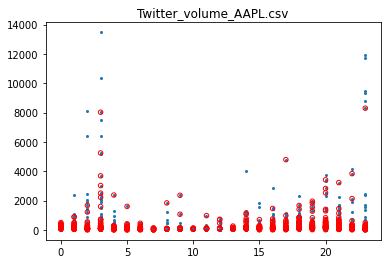

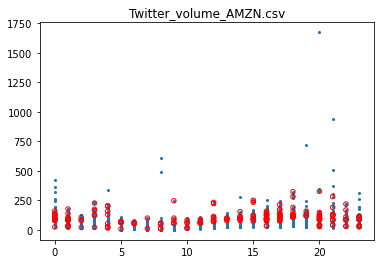

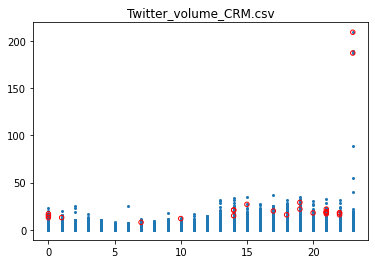

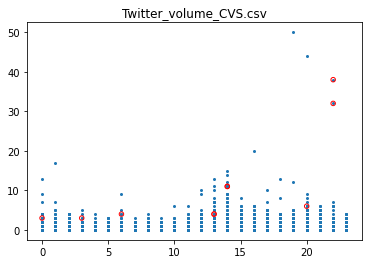

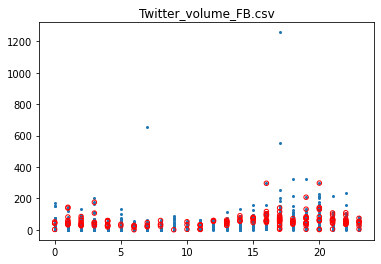

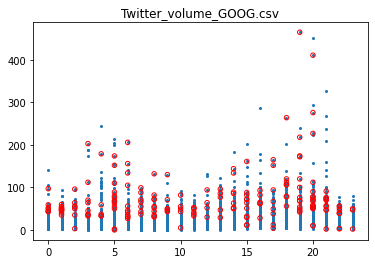

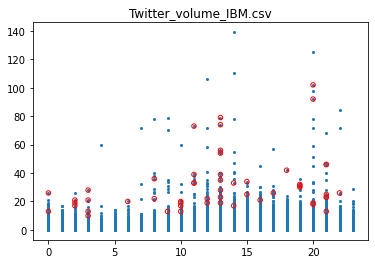

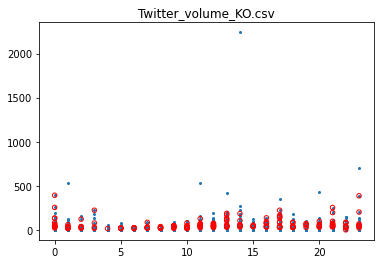

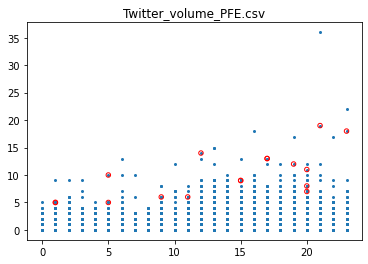

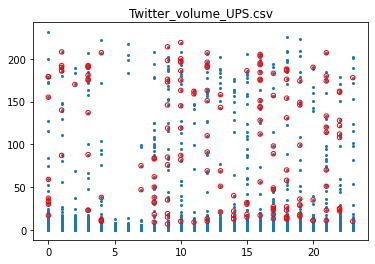

In [5]:
for i, data in enumerate(df):
    X = data[['hours', 'DayOfTheWeek', 'value']]
    clf = LocalOutlierFactor(n_neighbors=2)
    pred = clf.fit_predict(X)
    X_scores = clf.negative_outlier_factor_
    radius = list(map(lambda x: 0 if x**2 >= 1 else 20, X_scores))
    plt.scatter(x=X['hours'], y=X['value'], s=4.)
    #radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
    plt.scatter(x=X['hours'], y=X['value'], s = radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
    plt.title(dfDict[i])
    plt.show();

This was extremely difficult to visualize using LOF.
Some of the data sets makes sense but others are seem to be off. My guess would be there isn't enough data for k-neighbors to be accurate enough.

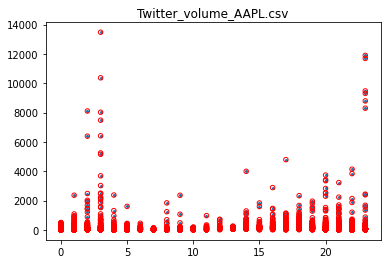

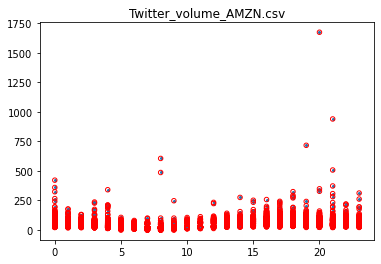

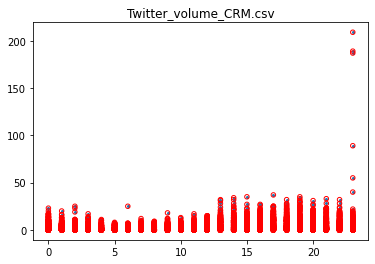

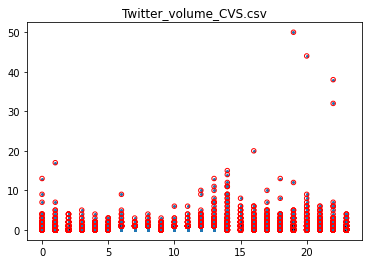

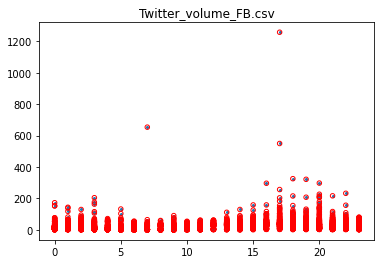

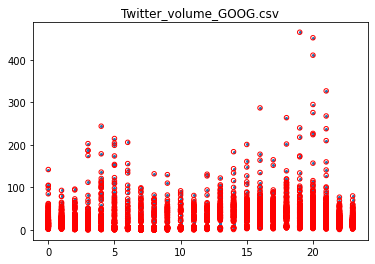

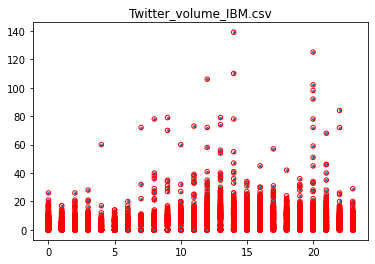

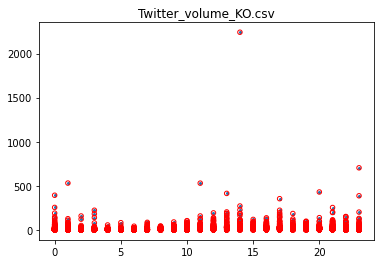

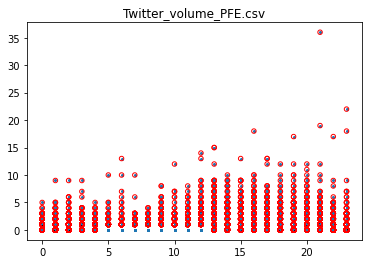

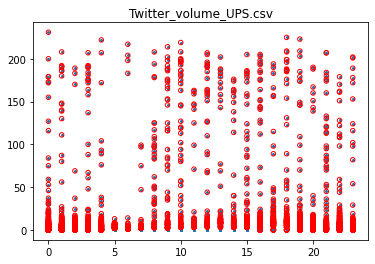

In [32]:
from sklearn.ensemble import IsolationForest
for i, data in enumerate(df):
    X = data[['hours', 'DayOfTheWeek', 'value']]
    clf = IsolationForest(random_state=0).fit(X)
    X_scores = clf.decision_function(X)
    #print(X_scores)
    radius = list(map(lambda x: 0 if x > 0 else 20, X_scores))
    #print(radius)
    plt.scatter(x=X['hours'], y=X['value'], s=4.)
    plt.scatter(x=X['hours'], y=X['value'], s = radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
    plt.title(dfDict[i])
    plt.show();